In [1]:
from graph import attach_graph_attributes, get_graph_measurements, compare_graph_measurements, print_comparison_results

from recreate_graph import graph_to_dataframe, get_trained_model, recreate_by_priority_rank

from real_graph import get_available_datasets, download_dataset, extract_dataset, load_graph, attach_real_attributes

Using TensorFlow backend.
/home/smoq/.virtualenvs/cna/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
available_datasets = get_available_datasets()

In [3]:
EPOCHS = 256
BATCH_SIZE = 16
VERBOSE = 0

In [4]:
dataset_name = 'moreno_seventh'

archive_filepath = download_dataset(dataset_name, available_datasets)
if archive_filepath:
    network_filepath = extract_dataset(dataset_name, archive_filepath)
    graph = load_graph(network_filepath)
    attach_graph_attributes(graph)
    
    df = graph_to_dataframe(graph)
    model = get_trained_model(df, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE)
    
    new_graph = recreate_by_priority_rank(graph, df, model)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)

Skipping download moreno_seventh - already exists
Skipping extracting moreno_seventh - already exists


In [5]:
attach_real_attributes(graph, network_filepath)
df = graph_to_dataframe(graph)
model = get_trained_model(df, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE)

new_graph = recreate_by_priority_rank(graph, df, model)

graph_measurements = get_graph_measurements(graph)
new_graph_measurements = get_graph_measurements(new_graph)

comparison_with_real_attributes = compare_graph_measurements(graph_measurements, new_graph_measurements)

In [6]:
print_comparison_results(comparison)
print('\nWith real attributes\n')
print_comparison_results(comparison_with_real_attributes)

(KS test p-value)  degree_centrality: 0.00370133198605959             [passed: False]
(KS test p-value)  closeness_centrality: 0.0004601053442009108        [passed: False]
(KS test p-value)  betweenness_centrality: 0.009388569190992901       [passed: False]
(KS test p-value)  pagerank: 0.3212846258050444                       [passed: True]
(abs distance)     average_shortest_path_length: 0.08971962616822436  [passed: False]
(abs distance)     diameter: 0.0                                      [passed: True]
(abs distance)     degree_centralization: 0.3767741935483869          [passed: False]
(abs distance)     density: 0.13928571428571435                       [passed: False]

With real attributes

(KS test p-value)  degree_centrality: 0.02210553192664323             [passed: False]
(KS test p-value)  closeness_centrality: 0.009388569190992936         [passed: False]
(KS test p-value)  betweenness_centrality: 0.04831235649763415        [passed: False]
(KS test p-value)  pagerank: 0.18

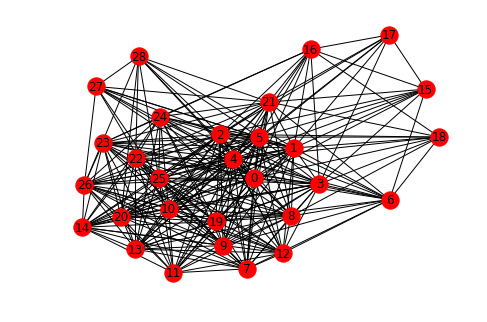

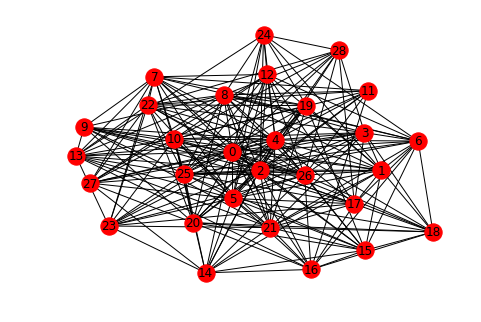

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(1)
nx.draw(graph, with_labels=True)
plt.figure(2)
nx.draw(new_graph, with_labels=True)
plt.show()